# Интернет-магазине «Стримчик»

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Задачи исследования:**

* Посмотрим, сколько игр выпускалось в разные годы. 
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.
* Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Определим какие платформы лидируют по продажам,какие растут или падают. Выберем несколько потенциально прибыльных платформ.
* Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесем выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам, на самые прибыльные жанры, на то выделяются ли жанры с высокими и низкими продажами.
* Составим портрет пользователя каждого региона
* Определим для пользователя каждого региона (NA, EU, JP):
    + Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    + Самые популярные жанры (топ-5). Поясним разницу.
    + Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.
* Проверим гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt
import missingno as msno
import seaborn as sns


E:\Apps\anacondas\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Шаг 1. Откроем файл с данными и изучим общую информацию.



In [3]:
data = pd.read_csv('games.csv')


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: нам на аналитику даны 16 715 строк об играх.

В каждой строке таблицы — данные об играх. Часть колонок описывает саму игру: тип платформы, жанр игры, название, год выпуска. Часть колонок о продажах в других странах: Северной Америке, Европе, Японии и остальных странах. Остальные данные рассказывают о рейтинге,оценках пользователей и критиков.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а также бросается  в  глаза, что год выпуска указан не в целочисленных значениях, названия столбцов с разными регистрами, что возможно не будет входить в общую статистику по игре, из-за разного названия(обрауется 2 катерогии игры, одне без точки в конце, другая с точкой).

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Шаг 2. Подготовим данные.

### Заменим названия столбцов (приведем к нижнему регистру).

Выведем на экран названия столбцов:

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименнуем столбцы.

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* 1   year_of_release(год выпуска) - float64 - переведем в целочисленный тип, так как года обычно целочисленно обозначаются,
* 2   user_score(оценка пользователей) - object - переведем в числовой объект с плавающей точкой, так как можно будет больше операций делать.

Все остальные категории подходящие.

In [9]:
data = data.astype({'year_of_release': "Int32"})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


Проверим есть ли в user_score помимо цифр объекты.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' обозначает "to be determined", что переводится как будет определен (в будущем). Значит можно заменить на Nan.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь мы сможем перевсти в формат float64, так как в столбце остались только численные значения. 

In [12]:
data = data.astype({'user_score': "float64"})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработаем пропуски при необходимости.

Посчитаем, сколько в таблице пропущенных значений.

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [14]:
sns.set()

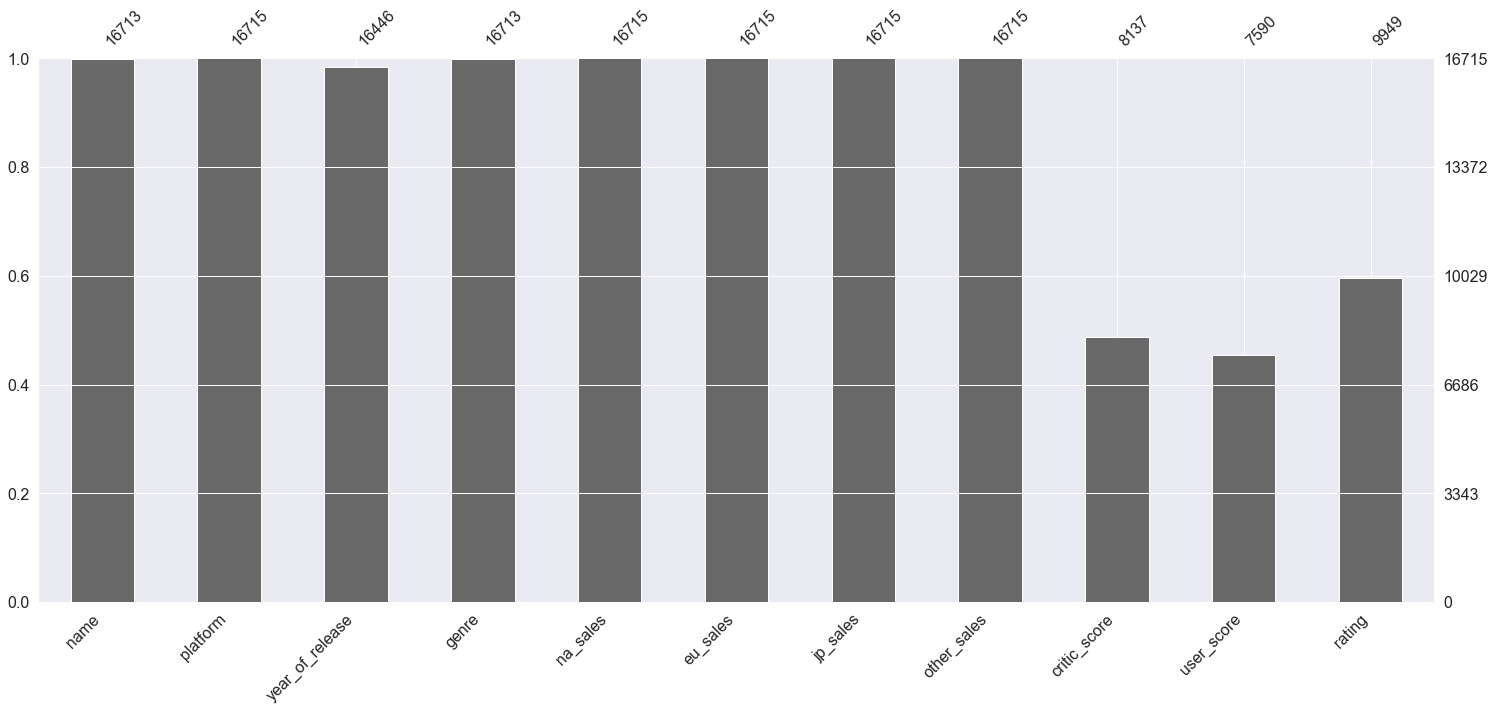

In [15]:
msno.bar(data);

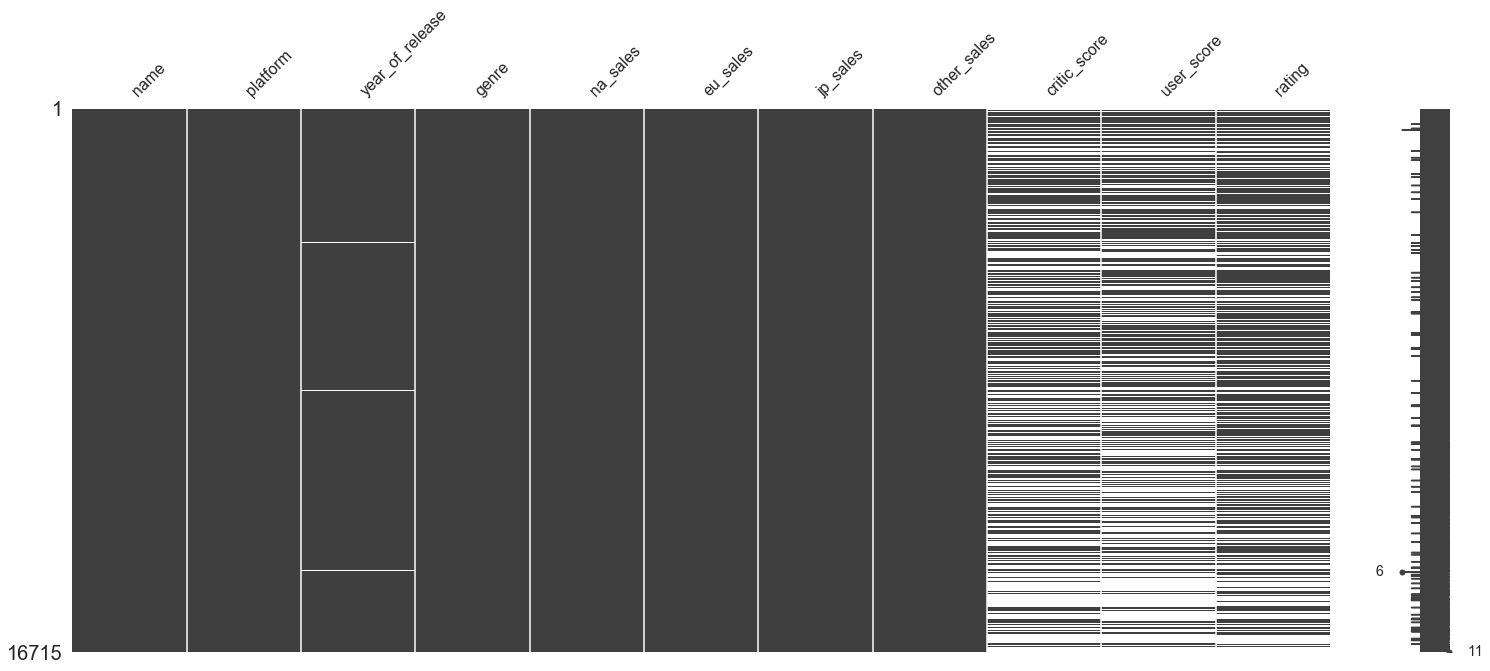

In [16]:
msno.matrix(data);

In [17]:
len(data.dropna())/len(data)*100

40.83757104397248

Строки с пустыми значениями 40% от всей таблицы, а удалить можно максимум 5%, поэтому все сразу нельзя удалять строки с пустыми значениями.

Закономерностей каких-либо в пропусках нет.

name(назвние игры) - 2, year_of_release(год выпуска) - 269, genre(жанр) - 2 -  очень мало значений, можно удалить, если в сумме будет удалений меньше 5 % от всей таблицы,

critic_score(оценка критиков) - 8578, user_score(оценка пользователей) - 9125, rating(рейтинг) - 6766 - заменим средним значением.

In [18]:
((data['name'].isna().sum() + data['year_of_release'].isna().sum() + data['genre'].isna().sum())/len(data))*100


1.6332635357463356

Можно удалить 1,6 процент данных, так как это меньше 5%.

In [19]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Остальные ячейки я оставлю с пропусками,чтобы они не повлияли на статистику(чтобы на графиках не было выбросов).

Проверим на дубликаты.

In [20]:
data.duplicated().sum()

0

Явных дубликатов нет. Проверим на неявные дубликаты, совпадающие по названию, платформе и году релиза одновременно.

In [21]:
data[['name', 'year_of_release', 'platform']].duplicated().sum()

1

In [22]:
data[data[['name', 'year_of_release', 'platform']].duplicated()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [23]:
data[(data['name']=='Madden NFL 13') & (data['year_of_release']==2012) & (data['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим строку 16230, где меньше всего данных о продажах.

In [24]:
data = data.drop(labels = [16230],axis = 0)

data[(data['name']=='Madden NFL 13') & (data['year_of_release']==2012) & (data['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [25]:
data[['name', 'year_of_release', 'platform']].duplicated().sum()

0

Неявный дубликат удалили.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [26]:
data['sales_regions'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_regions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Вывод.

Мы удалили данные в столбцах name, year_of_release, genre с пропусками меньше 2%. Остальные пропуски в столбцах critic_score, user_score, rating решили оставить, чтобы они не влияли на графики распределений, и не было никаких выбросов.Добавили столбец с общей суммой продаж -sales_regions.

Пропусков в name, year_of_release, genre мало, поэтому они могли произойти по невнимательности, что их забыли заполнить.

Пропуски в critic_score, user_score, rating скорей всего не заполняли специально, например люди не хотели ставить оценку, либо игра была не популярной поэтому оценки не собрались, либо игра была старой, и она вупускалась в то время, когда не ставили оценки играм.

Явных дубликатов нет.Удалили один неявный дубликат.

year_of_release(год выпуска) перевели в целочисленный тип, user_score(оценка пользователей) - object - перевели в числовой объект с плавающей точкой.

## Шаг 3. Проведите исследовательский анализ данных.

### Посмотрим, сколько игр выпускалось в разные годы.

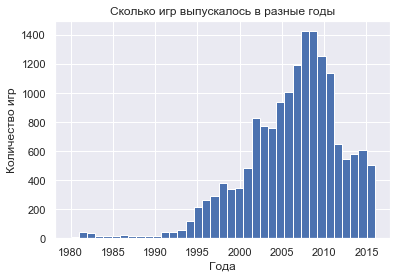

In [27]:
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(data['year_of_release'], bins=37) 

# Set title 
ax.set_title('Cколько игр выпускалось в разные годы') 

# adding labels 
ax.set_xlabel('Года') 
ax.set_ylabel('Количество игр') 


plt.show() 


Больше всего игра выпускалось в 2007,2008 годах, Далее количество игр пошло на спад.

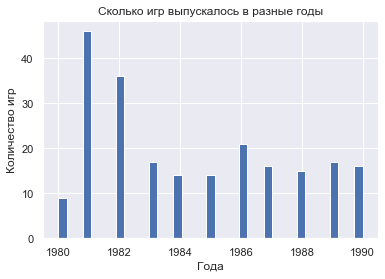

In [28]:
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(data['year_of_release'], bins=37, range=(1980,1990)) 

# Set title 
ax.set_title('Cколько игр выпускалось в разные годы') 

# adding labels 
ax.set_xlabel('Года') 
ax.set_ylabel('Количество игр') 
    
plt.show() 

Меньше всего игр в 1980, 1983, 1984, 1985, 1987, 1988.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [29]:
dataplatformsale = (pd.pivot_table(data, values='sales_regions', index='platform', aggfunc="sum")
                    .sort_values(by='sales_regions', ascending=False))
dataplatformsale

,sales_regions
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [30]:
dataplatformsaletearly = (pd.pivot_table(data[data['platform']
                        .isin(dataplatformsale.head(6).index.values)], 
                        values='sales_regions', columns='platform', index='year_of_release', aggfunc="sum"))

dataplatformsaletearly

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


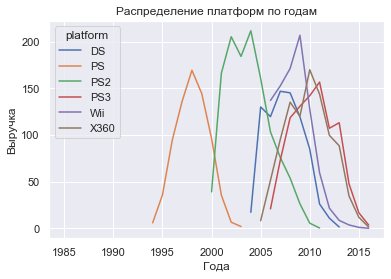

In [31]:
dataplatformsaletearly.plot(xlabel='Года', ylabel='Выручка', title='Распределение платформ по годам')

plt.show()

Появляются игры на платформах и возврастают в продажах примерно за 4-6 лет, постепенно падают продажи и платформы уходят 4-6 лет.

Расчитаем примерный срок жизни платформ.

In [32]:
dataplatformsaletearly.notna().sum(axis = 0).mean()

11.166666666666666

Примерный срок жизни платформ 11 лет.

### Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ за актуальный период, чтобы эти данные помогли построить прогноз на 2017 год.

Так как платформы трятят время на возрастание прибыли или уменьшение прибыли 4-6 лет, и нас интересует период, который способен помочь в прогнозировании прибыли, то возьмем данные за последние 4 года (2013-2016).

In [33]:
dataplatformsaletearlyall = (pd.pivot_table(data[data['platform']
                        .isin(dataplatformsale.index.values)], 
                        values='sales_regions', columns='platform', index='year_of_release', aggfunc="sum").reset_index())

dataplatformsaletearlyall

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


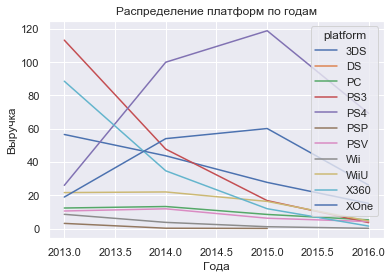

In [34]:
dataplatformsaletearlyall[dataplatformsaletearlyall['year_of_release'] > 2012].dropna(axis=1, how='all').plot(x = 'year_of_release', xlabel='Года', ylabel='Выручка', title='Распределение платформ по годам')
plt.show()

В целом все платформы идут на спад или уже перестали существовать. Но можно выделить потенциально прибыльные платформы на 2017 год PS4, XOne.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

E:\Apps\anacondas\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


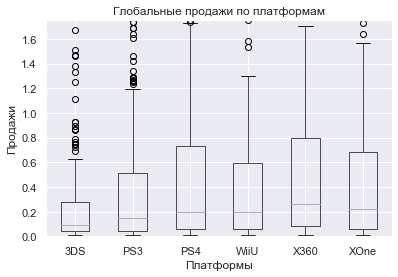

In [35]:
data[data['platform'].isin(pd.pivot_table(data[data['year_of_release']>2012], values='sales_regions', index='platform', aggfunc="sum").sort_values(by='sales_regions', ascending=False).head(6).index) & (data['year_of_release'] > 2012)].boxplot(column='sales_regions', by='platform').set(
    title = 'Глобальные продажи по платформам', xlabel = 'Платформы', ylabel = 'Продажи')
plt.ylim(0, 1.75)
plt.suptitle('')
plt.show()

Судя по медиане и дисперсии больще всего заработали игры X360. Меньше всего 3DS.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


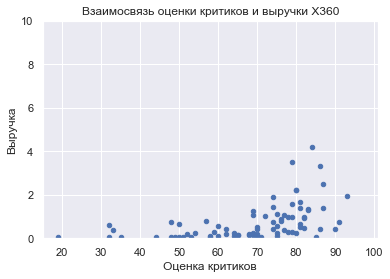

In [36]:
data[(data['platform']=='X360') & (data['year_of_release']>2012)].dropna().plot(x='critic_score', y='sales_regions', kind='scatter').set(
    title = 'Взаимосвязь оценки критиков и выручки X360', xlabel = 'Оценка критиков', ylabel = 'Выручка')
plt.ylim(0,10)
plt.show()


Видно ,что на высоких прибылях, с увеличением выручки, увеличивается оценка критиков. Но при этом у игр с низкой выручкой оценки сильно разнятся от минимальной к максимальной.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


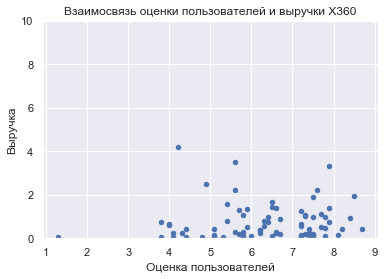

In [37]:
data[(data['platform']=='X360') & (data['year_of_release']>2012)].dropna().plot(x='user_score', y='sales_regions', kind='scatter').set(
    title = 'Взаимосвязь оценки пользователей и выручки X360', xlabel = 'Оценка пользователей', ylabel = 'Выручка')
plt.ylim(0,10)
plt.show()


Здесь мы видим больше выбросов, что даже при высокой выручке, пользователи могут оценить игру не очень хорошо, но в целом картина такая же на высоких прибылях, с увеличением выручки увеличивается и оценка, а на низких прибылях оценки разннобразные.

[Text(0.5, 1, 'Взаимосвязь оценки критиков и выручки X360')]

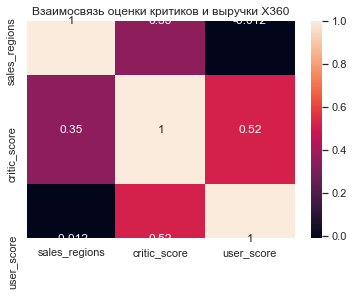

In [38]:
sns.heatmap(data[(data['platform']=='X360') & (data['year_of_release']>2012)][['sales_regions', 'critic_score','user_score']].corr(),annot=True).set(
    title = 'Взаимосвязь оценки критиков и выручки X360')


Корреляция между оценками критиков и выручкой выше, чем корреляция между оценкой пользователей и выручкой.корреляция между оценкой пользователей и выручкой отрицательна, значит она обратно прорциональна. Но корреляция довольно-таки низкая, нельзя сказать, что эти две величины сильно зависимы.

### Соотнесем выводы с продажами игр на других платформах.

In [39]:
def print_graf(platform):
    data[(data['platform']=='PS3') & (data['year_of_release']>2012)]
    data[(data['platform']==platform)& (data['year_of_release']>2012)].dropna().plot(x='critic_score', y='sales_regions', kind='scatter').set(
    title = 'Взаимосвязь оценки критиков и выручки ' + platform, xlabel = 'Оценка критиков', ylabel = 'Выручка')
    data[(data['platform']==platform)& (data['year_of_release']>2012)].dropna().plot(x='user_score', y='sales_regions', kind='scatter').set(
    title = 'Взаимосвязь оценки пользователей и выручки ' + platform, xlabel = 'Оценка пользователей', ylabel = 'Выручка')
    
    plt.ylim(0,10)
    
    plt.show()

    
def print_graf2(platform):
    sns.heatmap(data[(data['platform']== platform) & (data['year_of_release']>2012)][['sales_regions', 'critic_score','user_score']].corr(),annot=True).set(
    title = 'Взаимосвязь оценки критиков и выручки ' + platform)
    plt.show()


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что написала функции! Их можно объединить в одну </div>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


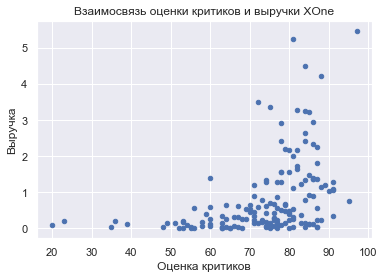

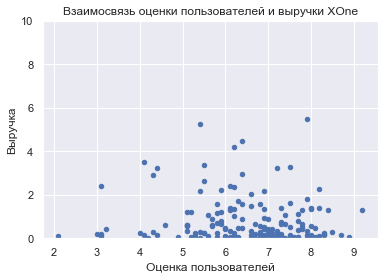

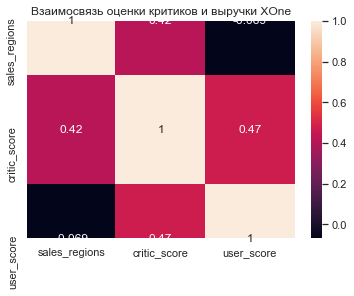

In [40]:
platform = 'XOne'
print_graf(platform)
print_graf2(platform)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


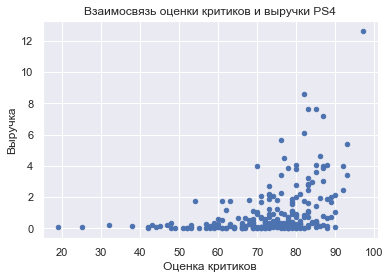

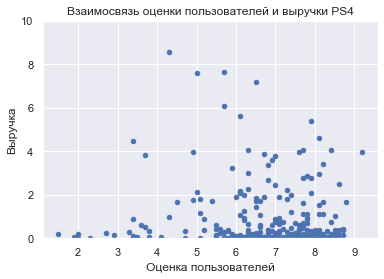

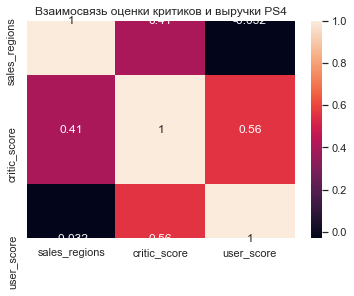

In [41]:
platform = 'PS4'
print_graf(platform)
print_graf2(platform)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


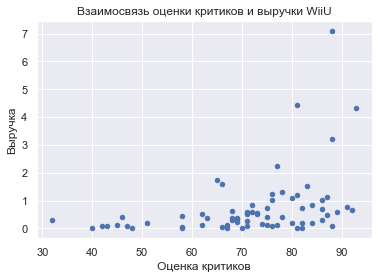

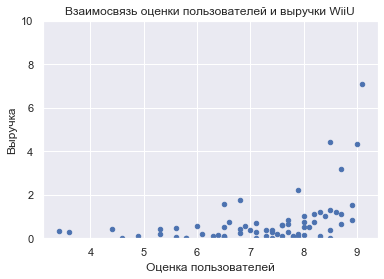

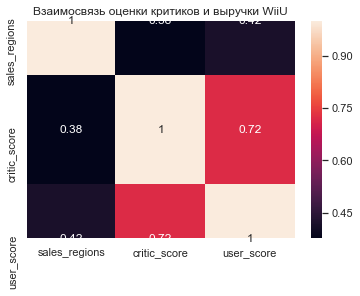

In [42]:
platform = 'WiiU'
print_graf(platform)
print_graf2(platform)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


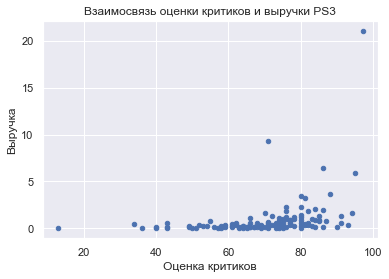

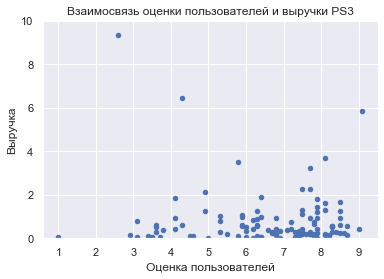

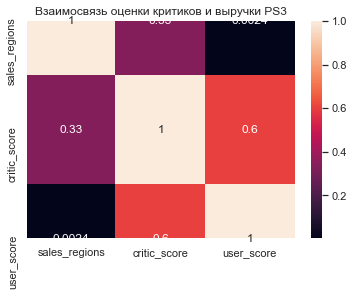

In [43]:
platform = 'PS3'

print_graf(platform)
print_graf2(platform)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


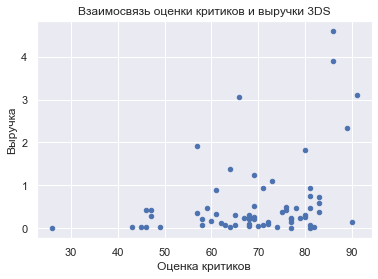

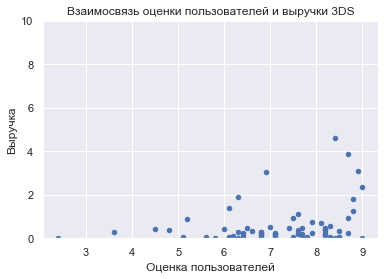

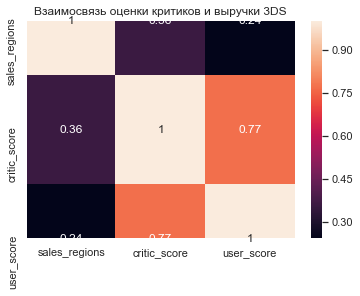

In [44]:
platform = '3DS'

print_graf(platform)
print_graf2(platform)

X360,XOne,PS4, PS3 - корреляция оценок критиков с выручкой выше, чем корреляция оценок пользователей с вручкой. Корреляция оценок критиков с выручкой прямо пропорциональна. Чем выше выручка, тем выше оценка критиков. Корреляция оценок пользователей с вручкой очень низкая, можно сказать, что взаимосвязи нет.

Выделилась платформа WiiU оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

платформа 3DS оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

### Посмотрим на общее распределение игр по жанрам.

E:\Apps\anacondas\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


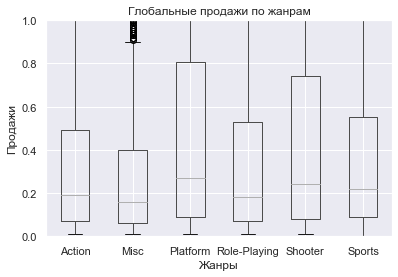

In [45]:
data[data['genre'].isin(pd.pivot_table(data[data['year_of_release']>2012], values='sales_regions', index='genre', aggfunc="sum").sort_values(by='sales_regions', ascending=False).head(6).index.values)].boxplot(column='sales_regions', by='genre').set(title = 'Глобальные продажи по жанрам', xlabel = 'Жанры', ylabel = 'Продажи')
plt.ylim(0, 1)
plt.suptitle('')
plt.show()

Самые высокие подажи в жанре Platform и Shooter.Меньше всего продаж в Misc.

Вывод.

Больше всего игра выпускалось в 2007,2008 годах, меньше всего - в 1980, 1983, 1984, 1985, 1987, 1988.

Появляются игры на платформах и возврастают в продажах примерно за 4-6 лет, постепенно падают продажи и платформы уходят 4-6 лет.

Потенциально прибыльные платформы на 2017 год PS4, XOne.

Больше всего заработали игры на платформах X360, в жанре Platform и Shooter. Меньше всего - на платформе 3DS, в жанре Misc.

Для всех платформ справедливо, что кореляция оценок критиков с выручкой выше, чем корреляция оценок пользователей с вручкой потому что даже при высокой выручке, пользователи могут оценить игру не очень хорошо.

X360,XOne,PS4, PS3 - корреляция оценок критиков с выручкой выше, чем корреляция оценок пользователей с вручкой. Корреляция оценок критиков с выручкой прямо пропорциональна. Чем выше выручка, тем выше оценка критиков. Корреляция оценок пользователей с вручкой очень низкая, можно сказать, что взаимосвязи нет.

Выделилась платформа WiiU оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

Платформа 3DS оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

Примерный срок жизни платформ 11 лет.

## Шаг 4. Составим портрет пользователя каждого региона.

### Самые популярные платформы (топ-5).

In [46]:
countries = ['na_sales', 'eu_sales', 'jp_sales']
def graf(typegraf):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    if typegraf=='platform':
        fig.suptitle('ТОП-5 платформ в регионах')
    else:
        fig.suptitle('ТОП-5 жанров в регионах')
    for i, country in enumerate(countries):

        # выделим топ платформ
        full_sales = data[data['year_of_release']>2012][country].sum()
        data_country = data[data['year_of_release']>2012].groupby(typegraf)[country].sum().reset_index().sort_values(country, ascending = False, ignore_index = True).head(5)
        # добавим все сотальные платформы, чтобы потом посчитать долю
        data_country[country] = data_country[country] / full_sales
        ax[i].bar(height = data_country[country], x = data_country[typegraf])
        ax[i].set_title(country.split('_')[0].upper())
        if typegraf=='platform':
            ax[i].set_xlabel('Платформы')
        else:
            ax[i].set_xlabel('Жанры')
        ax[i].set_ylabel('Продажи')

    plt.show()

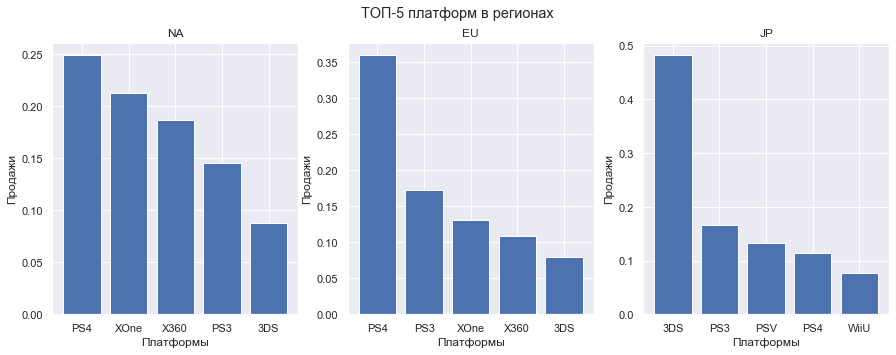

None


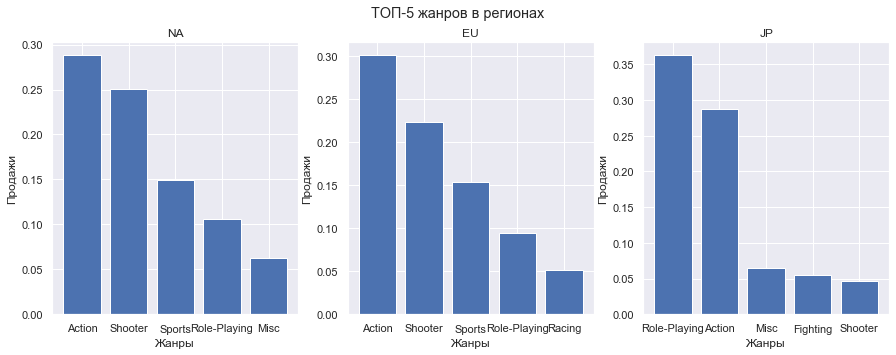

None


In [47]:
print(graf('platform'))
print(graf('genre'))


В северной Америке больше всего продаж на платформе PS4, в Европе - PS4, В Японии - 3DS.
По жанрам в Америке и Европе популярен - Action, в Японии - Role_Playing.

In [48]:
def graf_reiting(sales):
    data.groupby(by= 'rating', dropna = False)[sales].mean().plot.bar().set(title = 'Взаимосвязь рейтинга и выручки', xlabel = 'Рейтинг', ylabel = 'Выручка')
    plt.show()
    
  
    


Северная Америка


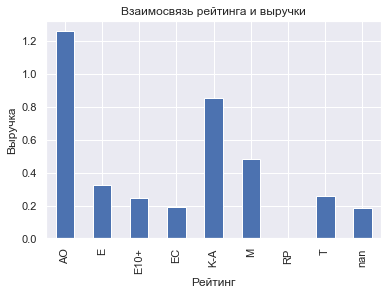

In [49]:
print('Северная Америка')
graf_reiting('na_sales')

Европа


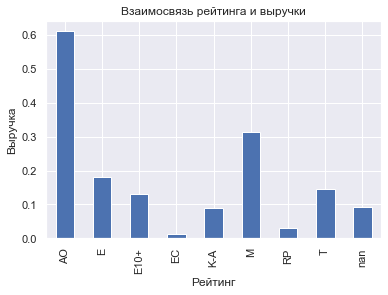

In [50]:
print('Европа')
graf_reiting('eu_sales')

Япония


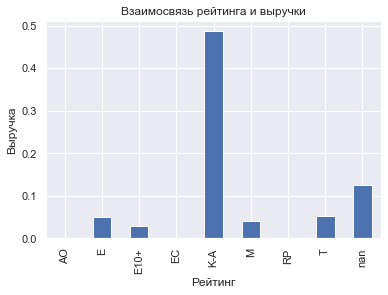

In [51]:
print('Япония')
graf_reiting('jp_sales')

В Северной Америке и Европе самая высокая выручка с рейтингом только для взрослых. В Японии - для всех.

Вывод.

В Северной Америке больше всего продаж на платформе PS4, жанр Action с рейтингом только для взрослых.

В Европе больше всего продаж на платформе PS4 жанр Action с рейтингом только для взрослых.

В Японии больше всего продаж на платформе 3DS, жанр Role_Playing для всех.


## Шаг 5. Проверим гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [52]:
results = st.ttest_ind(data[data['year_of_release'] > 2012].query('platform == "XOne"')['user_score'].dropna(), data[data['year_of_release'] > 2012].query('platform == "PC"')['user_score'].dropna(), equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  равны.

Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [53]:
results = st.ttest_ind(data[data['year_of_release'] > 2012].query('genre == "Action"')['user_score'].dropna(), data[data['year_of_release'] > 2012].query('genre == "Sports"')['user_score'].dropna(), equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

Вывод.

Средние пользовательские рейтинги платформ Xbox One и PC равны, Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны. Применили двухсторонний критерий, потому что все что больше или меньше заданного среднего значения в промежутке, то и является не равным.

## Шаг 6. Напишите общий вывод

Исследование об интернет-магазине «Стримчик» началось с предобработки данных.

Мы удалили пропуски в столбцах name, year_of_release, genre.Удалили один неявный дубликат. Добавили столбец с общей суммой продаж -sales_regions.
year_of_release(год выпуска) перевели в целочисленный тип, user_score(оценка пользователей) - object - перевели в числовой объект с плавающей точкой.

В таблице представлены игры на 31 платформе,12 жанров, выделены 3 страны и другие страны объденены в один столбец. С 1985 по 2016 год.

Больше всего игр выпускалось в 2007,2008 годах, меньше всего - в 1980, 1983, 1984, 1985, 1987, 1988.

Появляются игры на платформах и возврастают в продажах примерно за 4-6 лет, постепенно падают продажи и платформы уходят 4-6 лет.

Примерный срок жизни платформ 11 лет.

Потенциально прибыльные платформы на 2017 год PS4, XOne.

Больше всего заработали игры на платформах X360, в жанре Platform и Shooter. Меньше всего - на платформе 3DS, в жанре Misc.

X360,XOne,PS4, PS3 - корреляция оценок критиков с выручкой выше, чем корреляция оценок пользователей с вручкой. Корреляция оценок критиков с выручкой прямо пропорциональна. Чем выше выручка, тем выше оценка критиков. Корреляция оценок пользователей с вручкой очень низкая, можно сказать, что взаимосвязи нет.

Выделилась платформа WiiU оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

Платформа 3DS оценка критиков и оценка пользователей возрастает пропорциально прибыли.Оценка пользователей с прибылью имеет большую корреляцию чем оценка критиков с прибылью.

В Северной Америке больше всего продаж на платформе PS4, жанр Action с рейтингом только для взрослых.

В Европе больше всего продаж на платформе PS4 жанр Action с рейтингом только для взрослых.

В Японии больше всего продаж на платформе 3DS, жанр Role_Playing для всех.

Вы проверили 2 гипотезы и установили:

* средние пользовательские рейтинги платформ Xbox One и PC равны.

* cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

Рекомендации для маркетинга.

Потенциально прибыльные игры на платформах PS4, XOne, в жанре Platform и Shooter для взрослых или для всех возрастов.